In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
!pip install qulacs
!pip install qulacsvis
!pip install matplotlib
!pip install numpy
!pip install scipy

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
import random
import math
import scipy.optimize
from scipy import stats
from qulacs import QuantumState, Observable, QuantumCircuit
from qulacsvis import circuit_drawer
from qulacs.circuit import QuantumCircuitOptimizer
from qulacs.state import inner_product
from qulacs.gate import Identity, X,Y,Z
from qulacs.gate import H,S,Sdag,T,Tdag,sqrtX,sqrtXdag,sqrtY,sqrtYdag
from qulacs.gate import RX,RY,RZ,CNOT, CZ, SWAP
from qulacs.gate import to_matrix_gate,RandomUnitary,DenseMatrix,merge

# $t$を確率密度関数$g\left(t\right)=\frac{1}{\pi}\frac{\beta}{\beta^2+t^2}\exp(-\frac{\beta^2+t^2}{2\tau^2})$に従って棄却サンプリングする

In [5]:
import generator as gen

# g(t, β, τ)

In [113]:
gen.g(1,1,10)

5.920684802611233e-45

In [114]:
gen.g(0, 1, 10)

6.139401445823983e-23

目標分布：$P\left(t\right)=g(t)=\frac{1}{\pi}\frac{\beta}{\beta^2+t^2}\exp(-\frac{\beta^2+t^2}{2\tau^2})$

提案分布 : $Q(t)=g(0)$

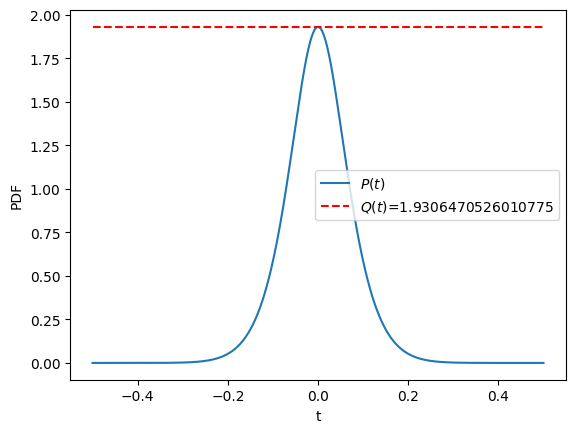

In [55]:
β=0.1
τ=10
tmax = 0.5
tmin = -1*tmax
x = np.linspace(tmin,tmax,10**3)
P = gen.g(x,β,τ)
Q = gen.g(0,β,τ)
plt.plot(x,P,label="$P(t)$")
plt.plot([tmin, tmax],[Q, Q], "red", linestyle='dashed',label=f'$Q(t)$={Q}')
plt.xlabel("t")
plt.ylabel('PDF')
plt.legend()
plt.show()


# sampling(tmin=-0.5, tmax=0.5, β=1, τ=10)

# integral_C(f, β, τ, flag=0)

In [7]:
β=0.1
τ=10
tmax = 0.5
tmin = -1*tmax
C = gen.integral_C(gen.g, β, τ)
x = np.linspace(tmin,tmax,10**4)
y = gen.g(x,β,τ)/C

In [8]:
# get sample
N = 10**5
# time measure
t_mes_0 = dt.datetime.now()
# sampling using rejection sampling
samples = np.array([gen.sampling(tmin,tmax,β,τ) for i in range(N)])
# time measure
t_mes_1 = dt.datetime.now()
print('Elapsed Time: ', t_mes_1- t_mes_0)


Elapsed Time:  0:00:04.364369


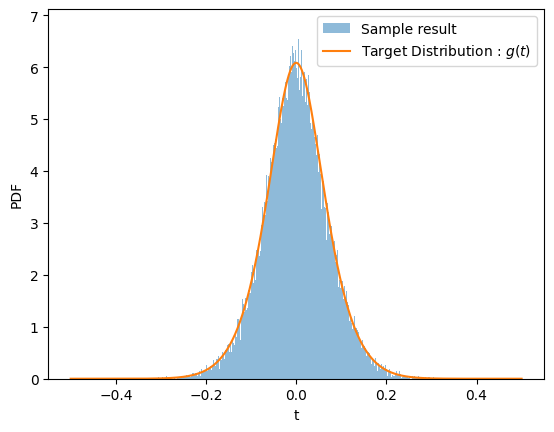

In [9]:
# plot
%matplotlib inline
plt.hist(samples, bins = 10**3, density = True, alpha = 0.5, label = 'Sample result')
plt.plot(x,y, label = 'Target Distribution : $g(t)$')
plt.xlabel("t")
plt.ylabel('PDF')
plt.legend()
plt.show()


In [10]:
# get sample
N = 10**7
# time measure
t_mes_0 = dt.datetime.now()
# sampling using rejection sampling
samples = np.array([gen.sampling(tmin,tmax,β,τ) for i in range(N)])
# time measure
t_mes_1 = dt.datetime.now()
print('Elapsed Time: ', t_mes_1- t_mes_0)


Elapsed Time:  0:07:15.638373


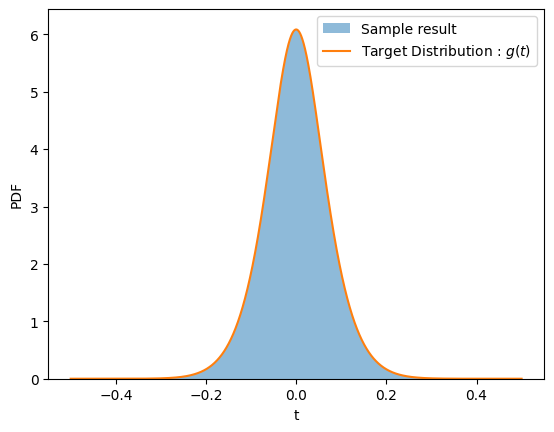

In [11]:
# plot
%matplotlib inline
plt.hist(samples, bins = 10**3, density = True, alpha = 0.5, label = 'Sample result')
plt.plot(x,y, label = 'Target Distribution : $g(t)$')
plt.xlabel("t")
plt.ylabel('PDF')
plt.legend()
plt.show()

# calculate_aO(nqubits, coef_1, coef_2)

# prepare_sample_target(nqubits, coef_1, coef_2, aO)

# select_obs_Ising(nqubits, coef_1, coef_2, aO, obs_list_total, prob_list_total)

In [12]:
# trotter stride
δ = 0.1
# parameter
λ = 1.5
E_0 = 0
β=0.01
τ=10
# number of random sampling (t,t')
Ns = 10**1
# number of circuit shots
Ms = 10**1
# range of (t,t')
tmax = 0.5
tmin = -1*tmax

nqubits = 4

In [13]:
coef_1 = -1*(2-λ)
coef_2 = -1*λ

In [14]:
aO = gen.calculate_aO(nqubits, coef_1, coef_2)
aO

6.0

In [15]:
obs_list_total, prob_list_total = gen.prepare_sample_target(nqubits, coef_1, coef_2, aO)

In [16]:
obs_list_total

[[3, 0, -0.5],
 [3, 1, -0.5],
 [3, 2, -0.5],
 [1, 0, -1.5],
 [1, 1, -1.5],
 [1, 2, -1.5]]

In [17]:
obs_list_total[5]

[1, 2, -1.5]

In [18]:
prob_list_total

[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.25,
 0.25,
 0.25]

In [19]:
gen.select_obs_Ising(nqubits, coef_1, coef_2, aO, obs_list_total, prob_list_total)

array([ 1. ,  0. , -1.5])

In [36]:
gen.select_obs_Ising(nqubits, coef_1, coef_2, aO, obs_list_total, prob_list_total)

array([ 3. ,  2. , -0.5])